### Train the NGBoost model

Implementation of [LightGBMTrainer](https://github.com/HealthRex/healthrex_ml/blob/main/healthrex_ml/trainers/sklearn_trainers.py#L23)

In [1]:
# import sys
# sys.path.append('../../')
from healthrex_ml.trainers import LightGBMTrainer
from healthrex_ml.trainers import NGBoostTrainer

RUN_NAME = "20230207_baseline_jyx_cbc_withlast"
trainer = NGBoostTrainer(working_dir=f"./{RUN_NAME}_artifacts")
tasks = ['label_PLT', 'label_HCT', 'label_WBC', 'label_HGB']

for task in tasks:
    trainer(task)

### Evaluate model performance on test set and dump 

Implementation of [BinaryEvaluator](https://github.com/HealthRex/healthrex_ml/blob/main/healthrex_ml/evaluators/evaluators.py#L21) NPVEvaluator

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:41<00:00, 25.26s/it]


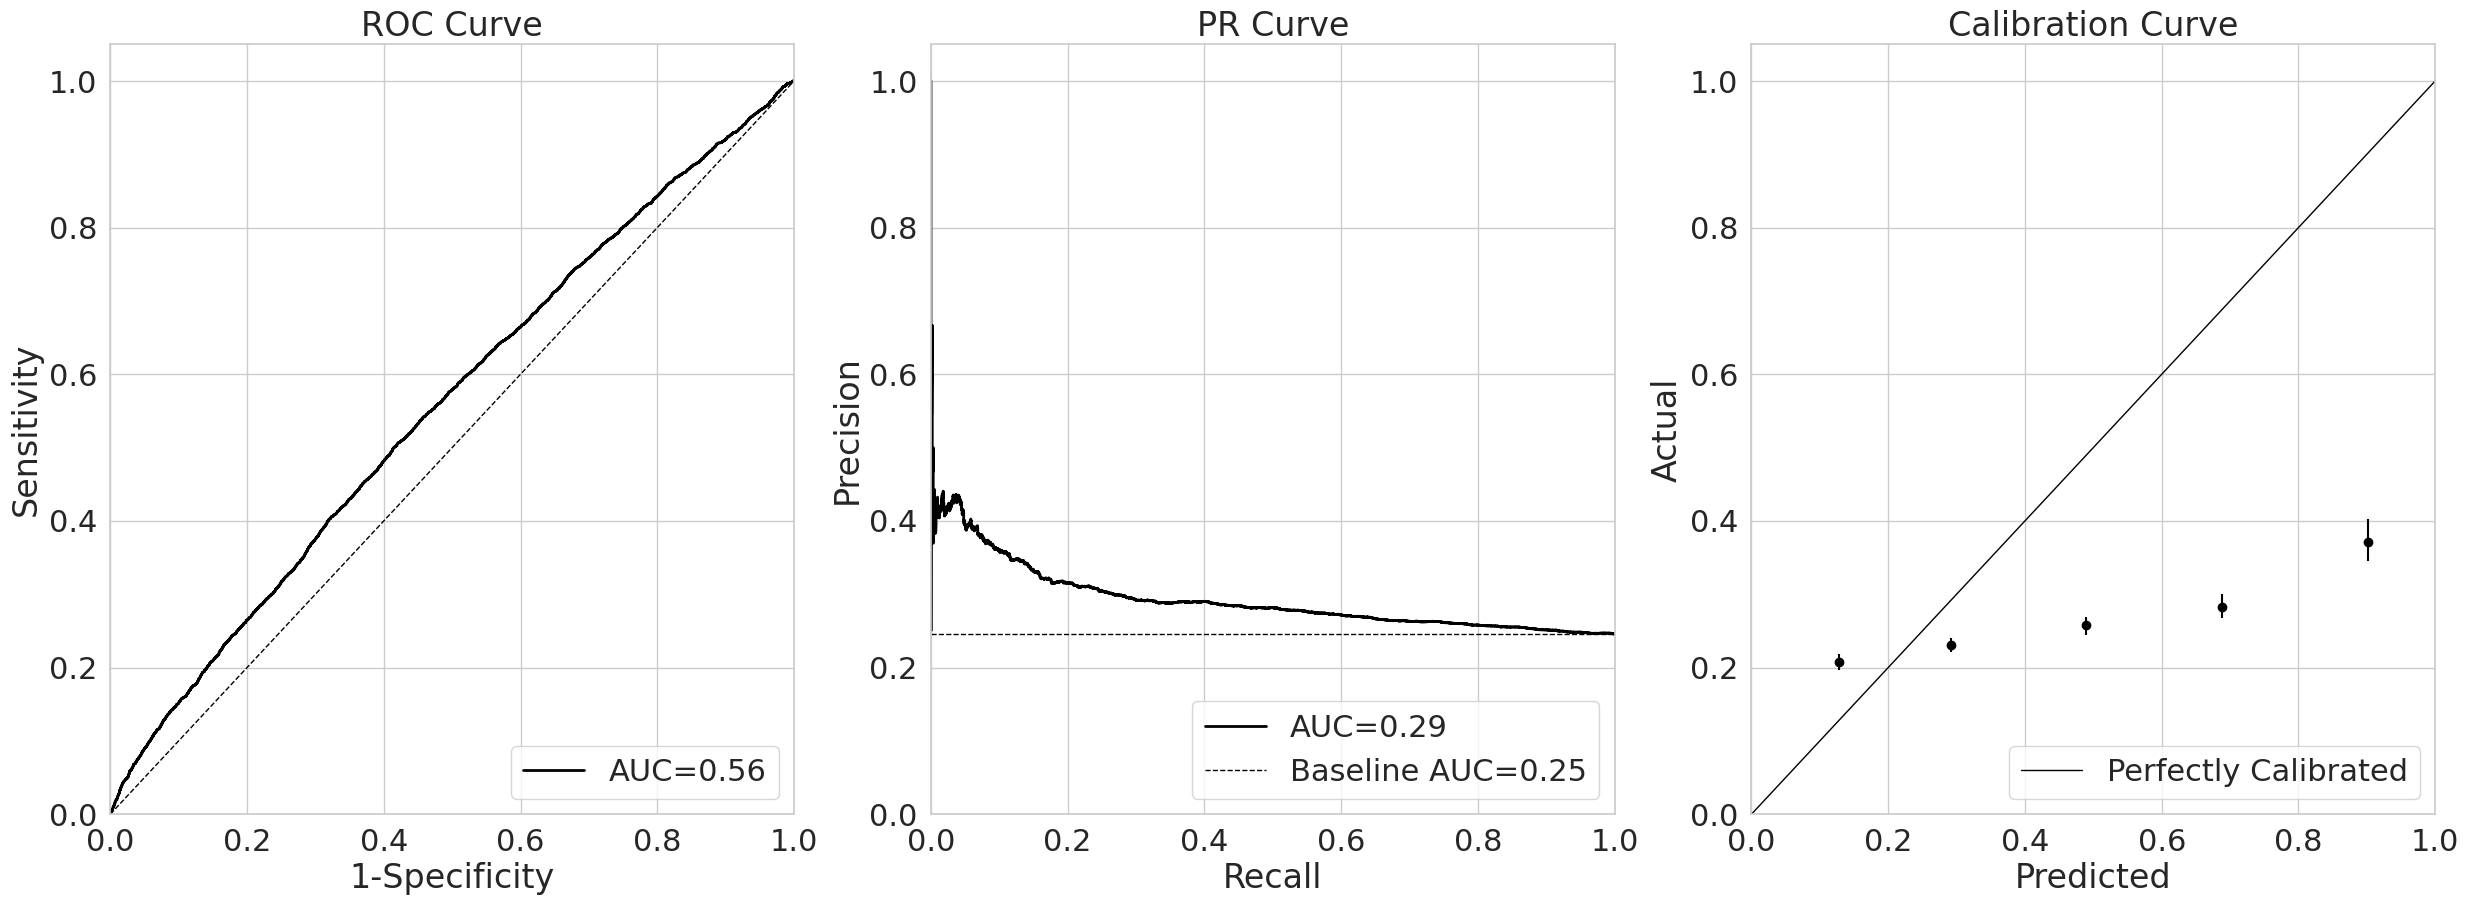

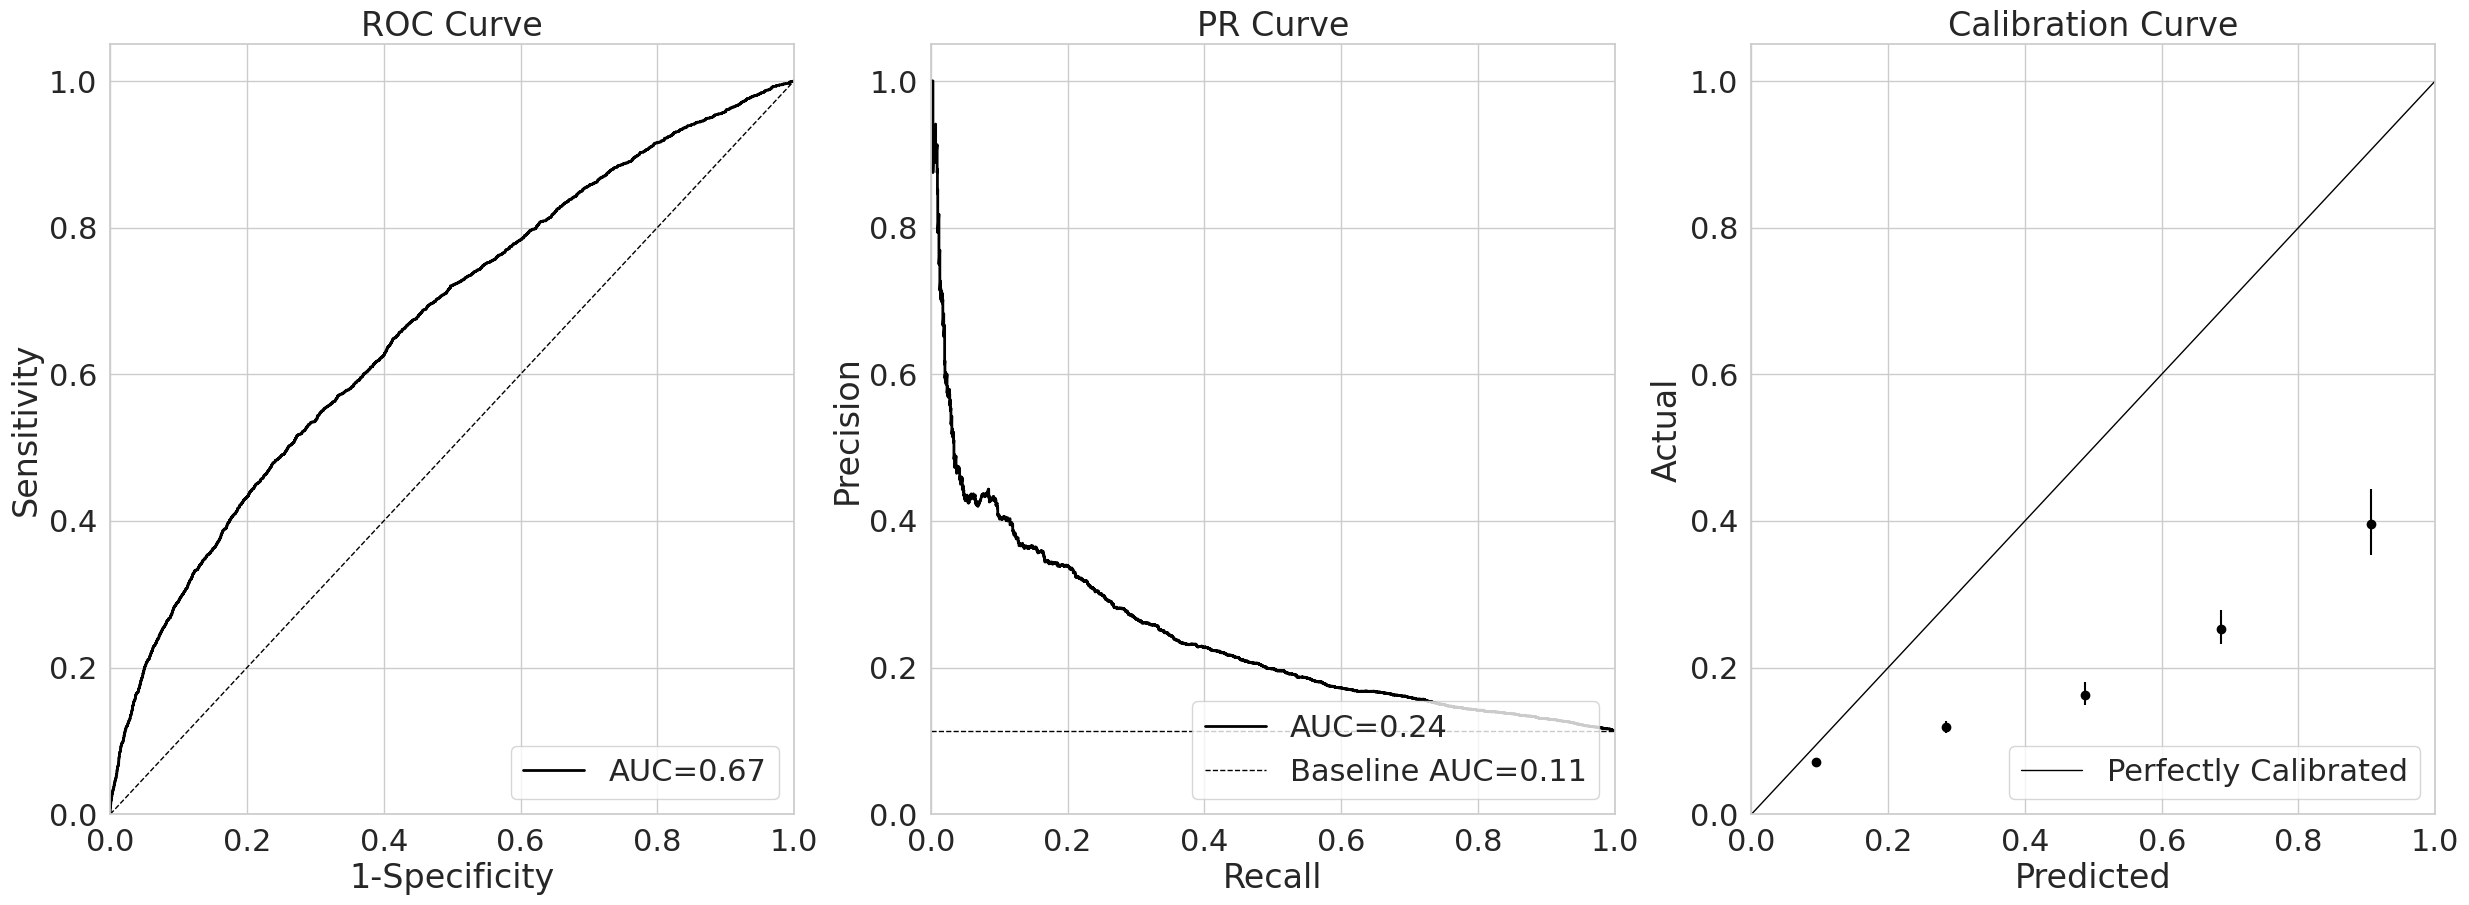

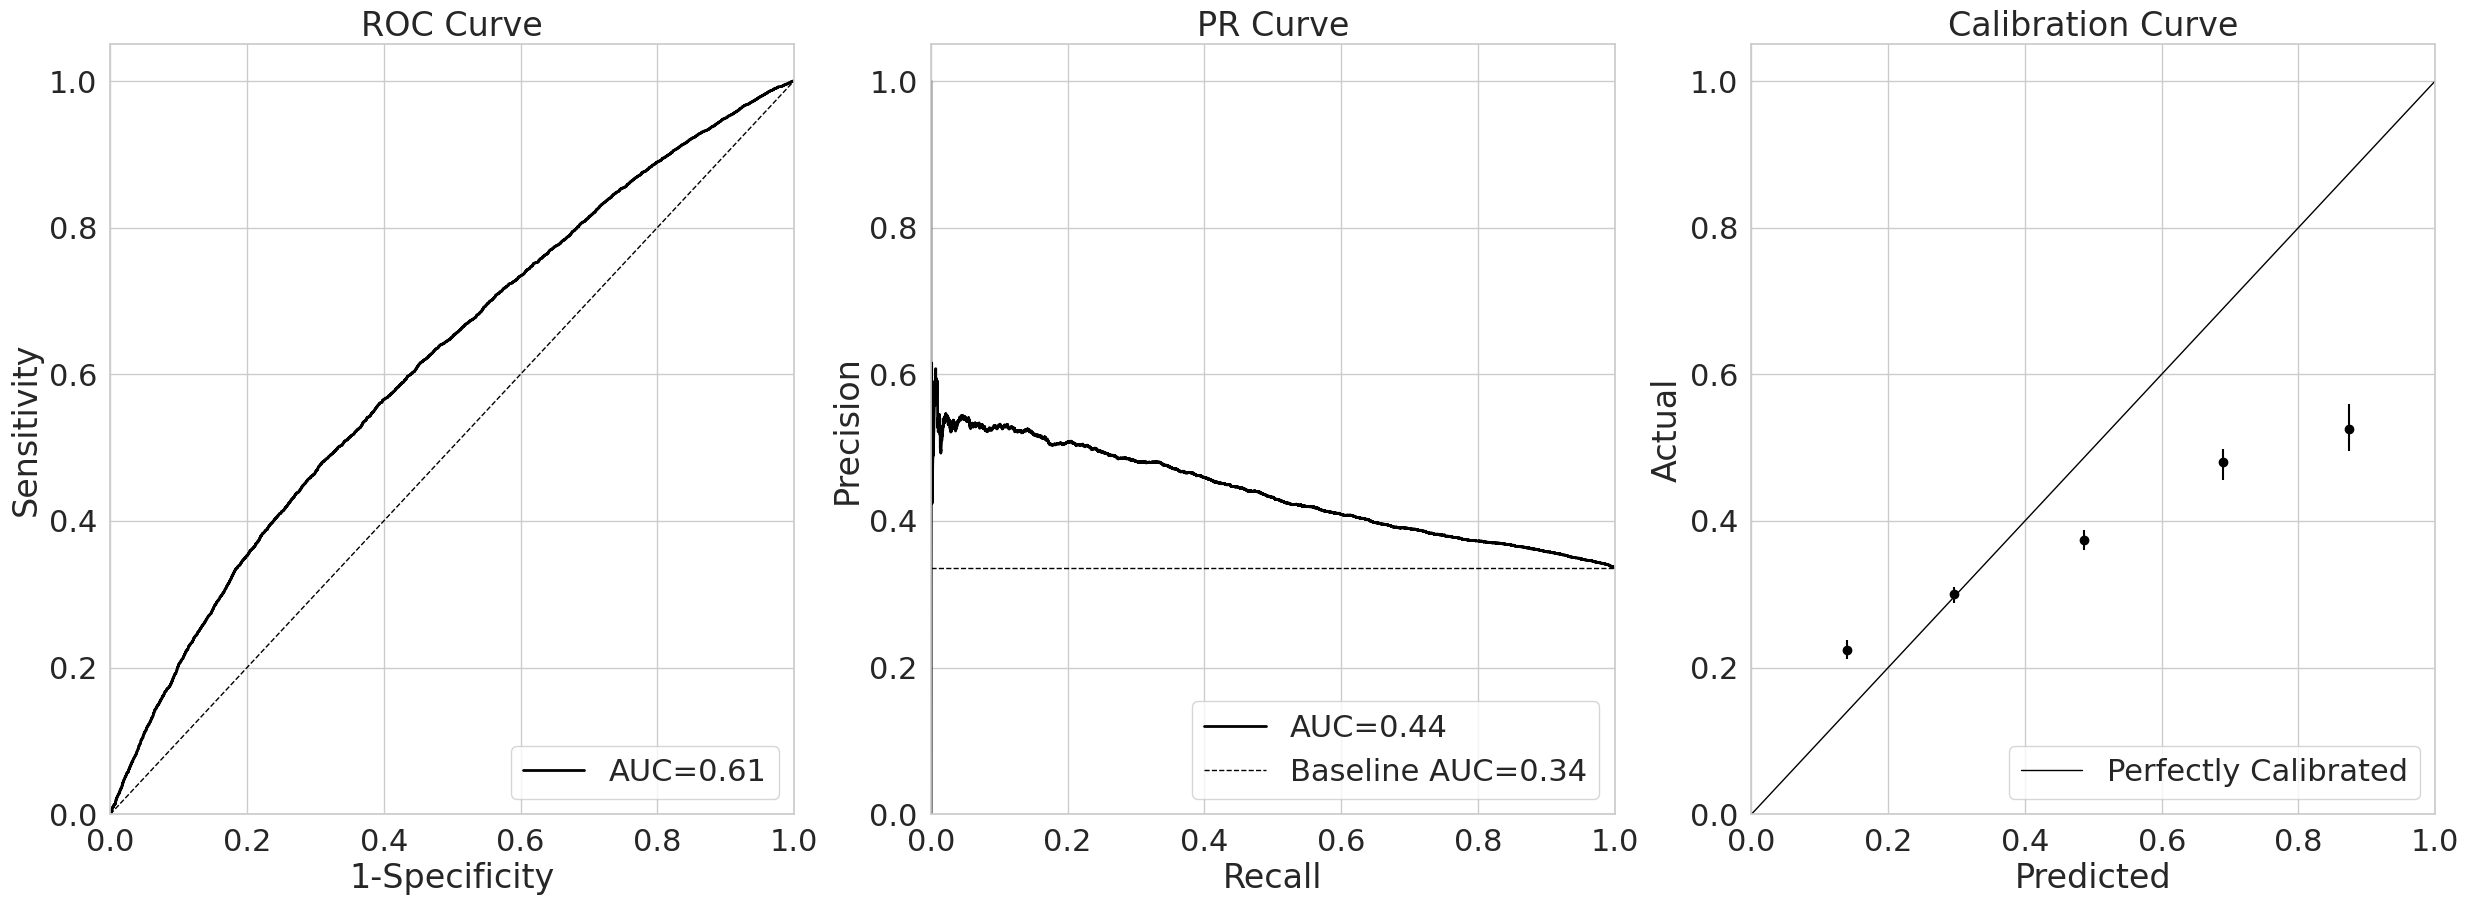

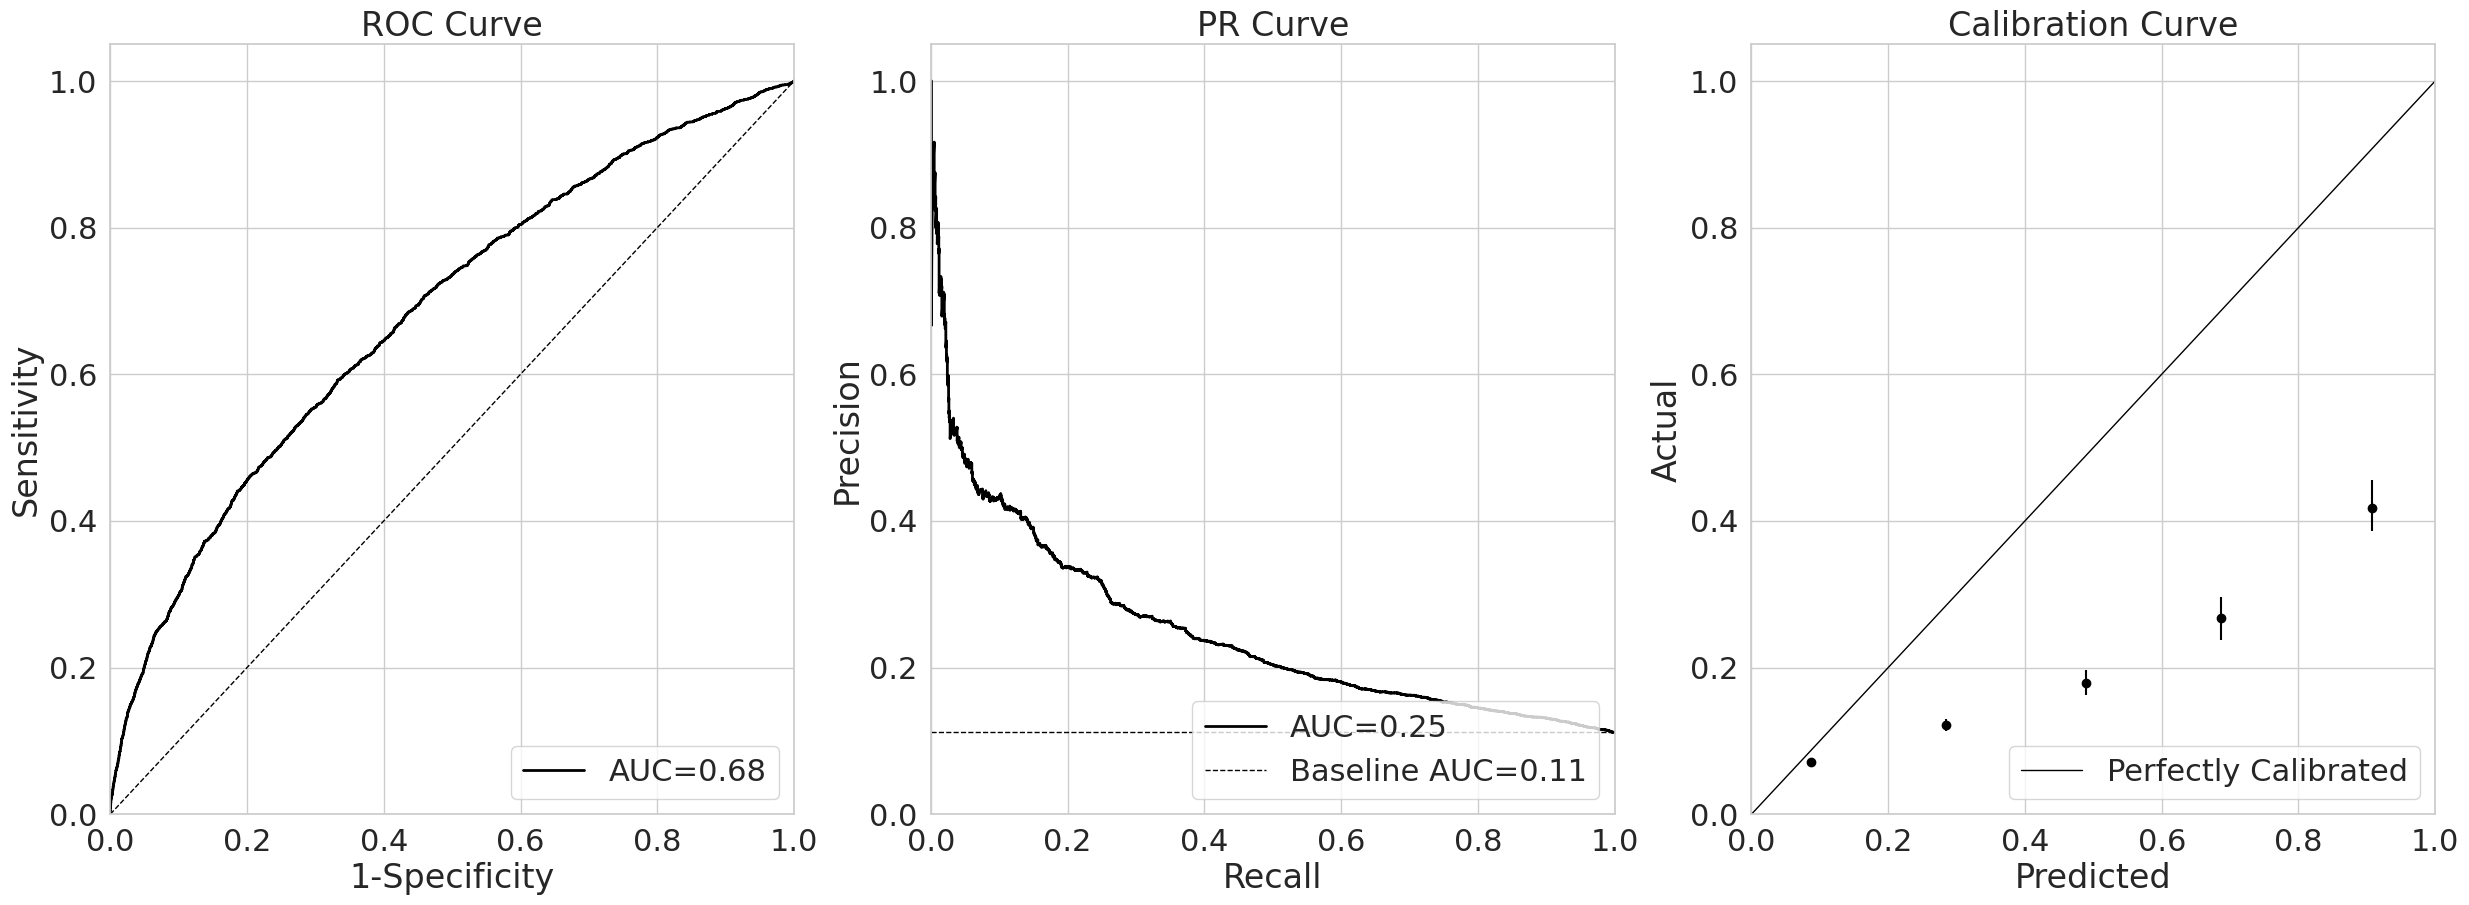

In [3]:
from healthrex_ml.evaluators import BinaryEvaluator
from tqdm import tqdm
import pandas as pd
import os

for task in tqdm(tasks):
    evalr = BinaryEvaluator(
        outdir=f"./{RUN_NAME}_artifacts/{task}_performance_artificats/",
        task_name=task
    )
    df_yhats = pd.read_csv(os.path.join(trainer.working_dir, f"{task}_regression_yhats.csv"))
    evalr.NPV_eval(df_yhats.last_labels, df_yhats.labels, df_yhats.predictions, df_yhats.distribution_norm, pred_type='lower')

### Train the XGBoost model for baseline

In [1]:
from healthrex_ml.trainers import LightGBMTrainer

RUN_NAME = "20230207_baseline_jyx_cbc_withlast"
trainer = LightGBMTrainer(working_dir=f"./{RUN_NAME}_artifacts")
tasks = ['label_PLT', 'label_HCT', 'label_WBC', 'label_HGB']

for task in tasks:
    trainer(task, True)

/atlas/u/xniac/miniconda3/envs/torch_env/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.638558	valid_0's binary_logloss: 0.665869
[400]	valid_0's auc: 0.646493	valid_0's binary_logloss: 0.659875
[600]	valid_0's auc: 0.648572	valid_0's binary_logloss: 0.658187
[800]	valid_0's auc: 0.648789	valid_0's binary_logloss: 0.657877
Early stopping, best iteration is:
[871]	valid_0's auc: 0.648889	valid_0's binary_logloss: 0.657785
label_PLT AUC: 0.65


/atlas/u/xniac/miniconda3/envs/torch_env/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/atlas/u/xniac/miniconda3/envs/torch_env/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.668001	valid_0's binary_logloss: 0.460763
[400]	valid_0's auc: 0.677534	valid_0's binary_logloss: 0.454148
[600]	valid_0's auc: 0.681608	valid_0's binary_logloss: 0.451596
[800]	valid_0's auc: 0.683288	valid_0's binary_logloss: 0.45062
[1000]	valid_0's auc: 0.683927	valid_0's binary_logloss: 0.450162
Did not meet early stopping. Best iteration is:
[995]	valid_0's auc: 0.683946	valid_0's binary_logloss: 0.450163
label_HCT AUC: 0.68


/atlas/u/xniac/miniconda3/envs/torch_env/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/atlas/u/xniac/miniconda3/envs/torch_env/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.612776	valid_0's binary_logloss: 0.633886
[400]	valid_0's auc: 0.617577	valid_0's binary_logloss: 0.630808
[600]	valid_0's auc: 0.618051	valid_0's binary_logloss: 0.630235
Early stopping, best iteration is:
[539]	valid_0's auc: 0.618304	valid_0's binary_logloss: 0.630268
label_WBC AUC: 0.61


/atlas/u/xniac/miniconda3/envs/torch_env/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/atlas/u/xniac/miniconda3/envs/torch_env/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.681427	valid_0's binary_logloss: 0.453977
[400]	valid_0's auc: 0.690385	valid_0's binary_logloss: 0.446878
[600]	valid_0's auc: 0.695343	valid_0's binary_logloss: 0.443722
[800]	valid_0's auc: 0.696748	valid_0's binary_logloss: 0.442601
[1000]	valid_0's auc: 0.697342	valid_0's binary_logloss: 0.442111
Did not meet early stopping. Best iteration is:
[999]	valid_0's auc: 0.697345	valid_0's binary_logloss: 0.442112
label_HGB AUC: 0.69


/atlas/u/xniac/miniconda3/envs/torch_env/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Evaluate model performance on test set and dump 

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:38<00:00, 24.55s/it]


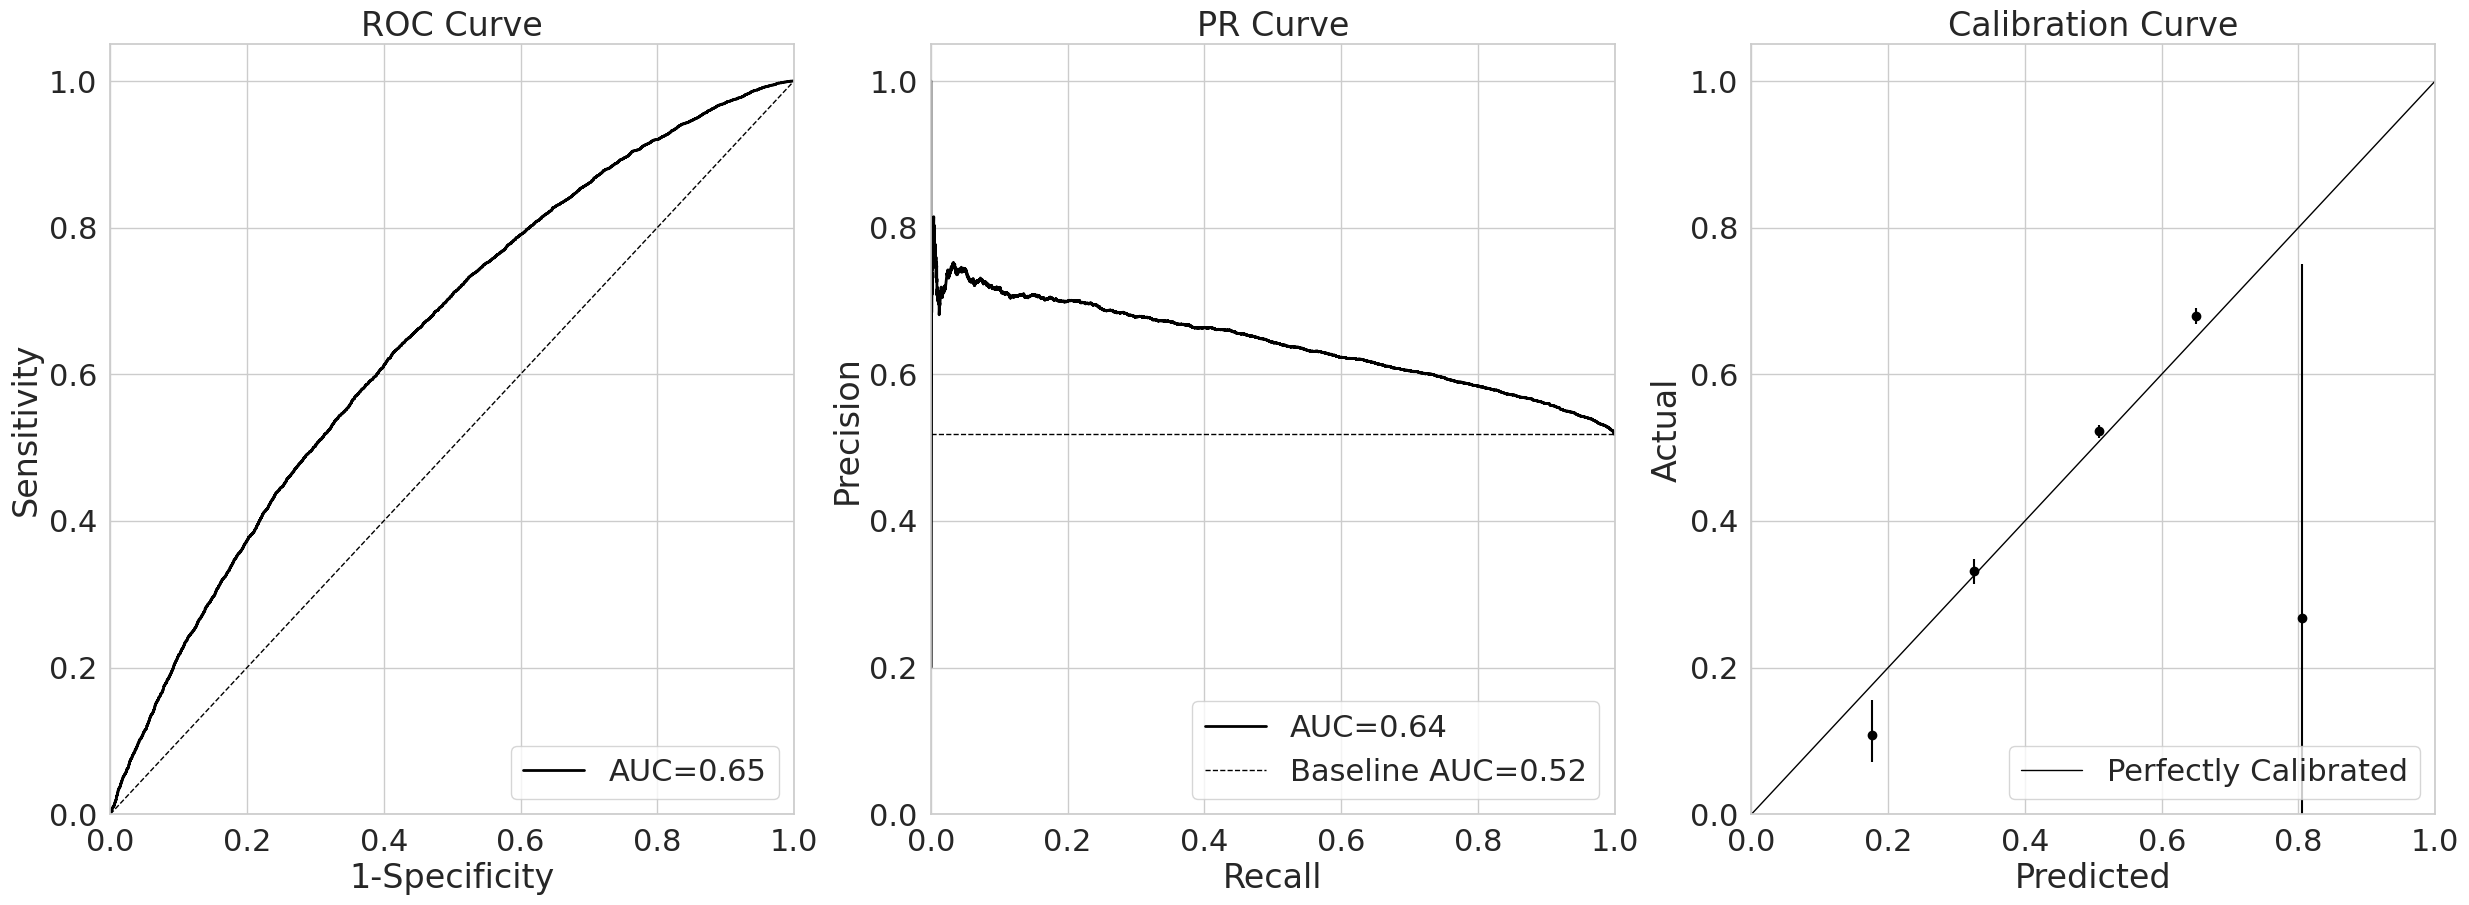

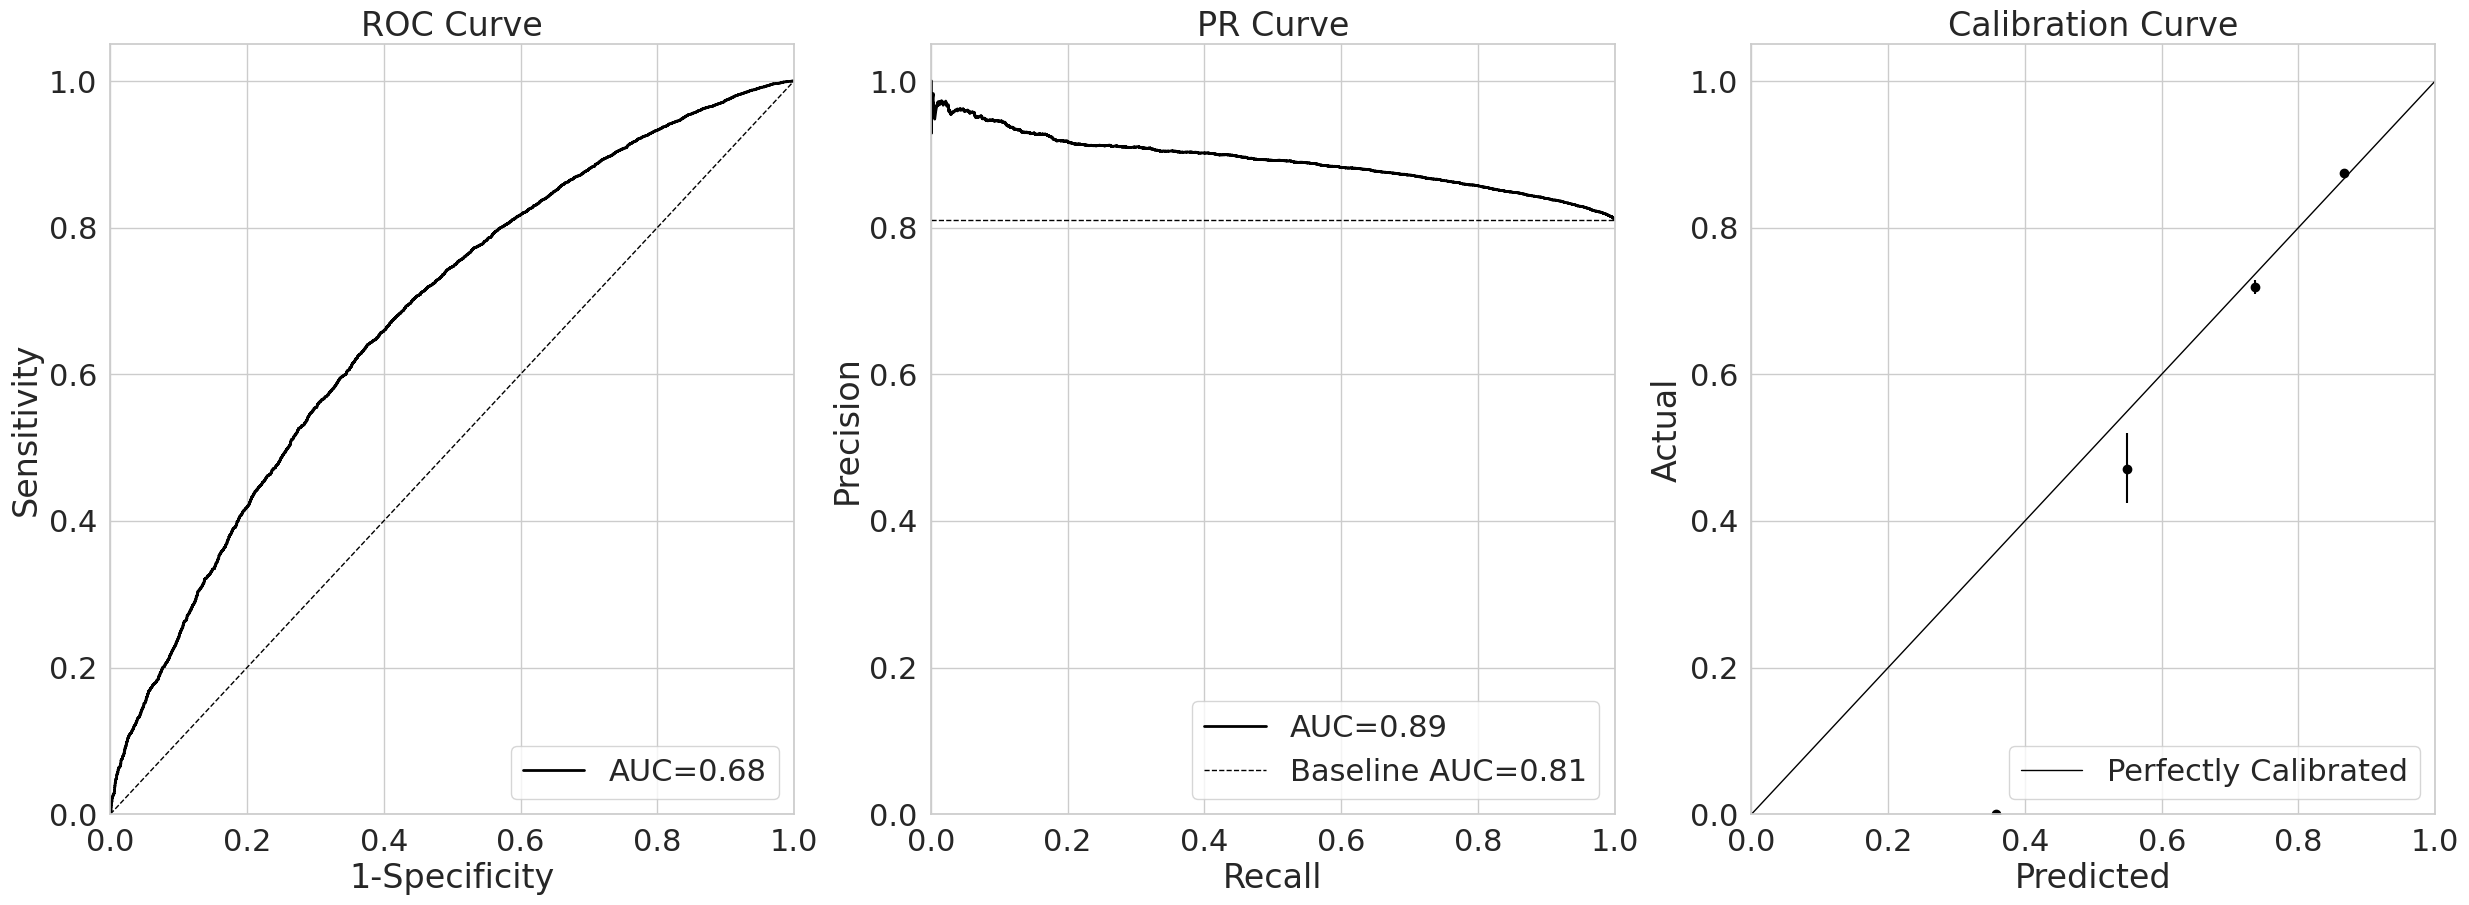

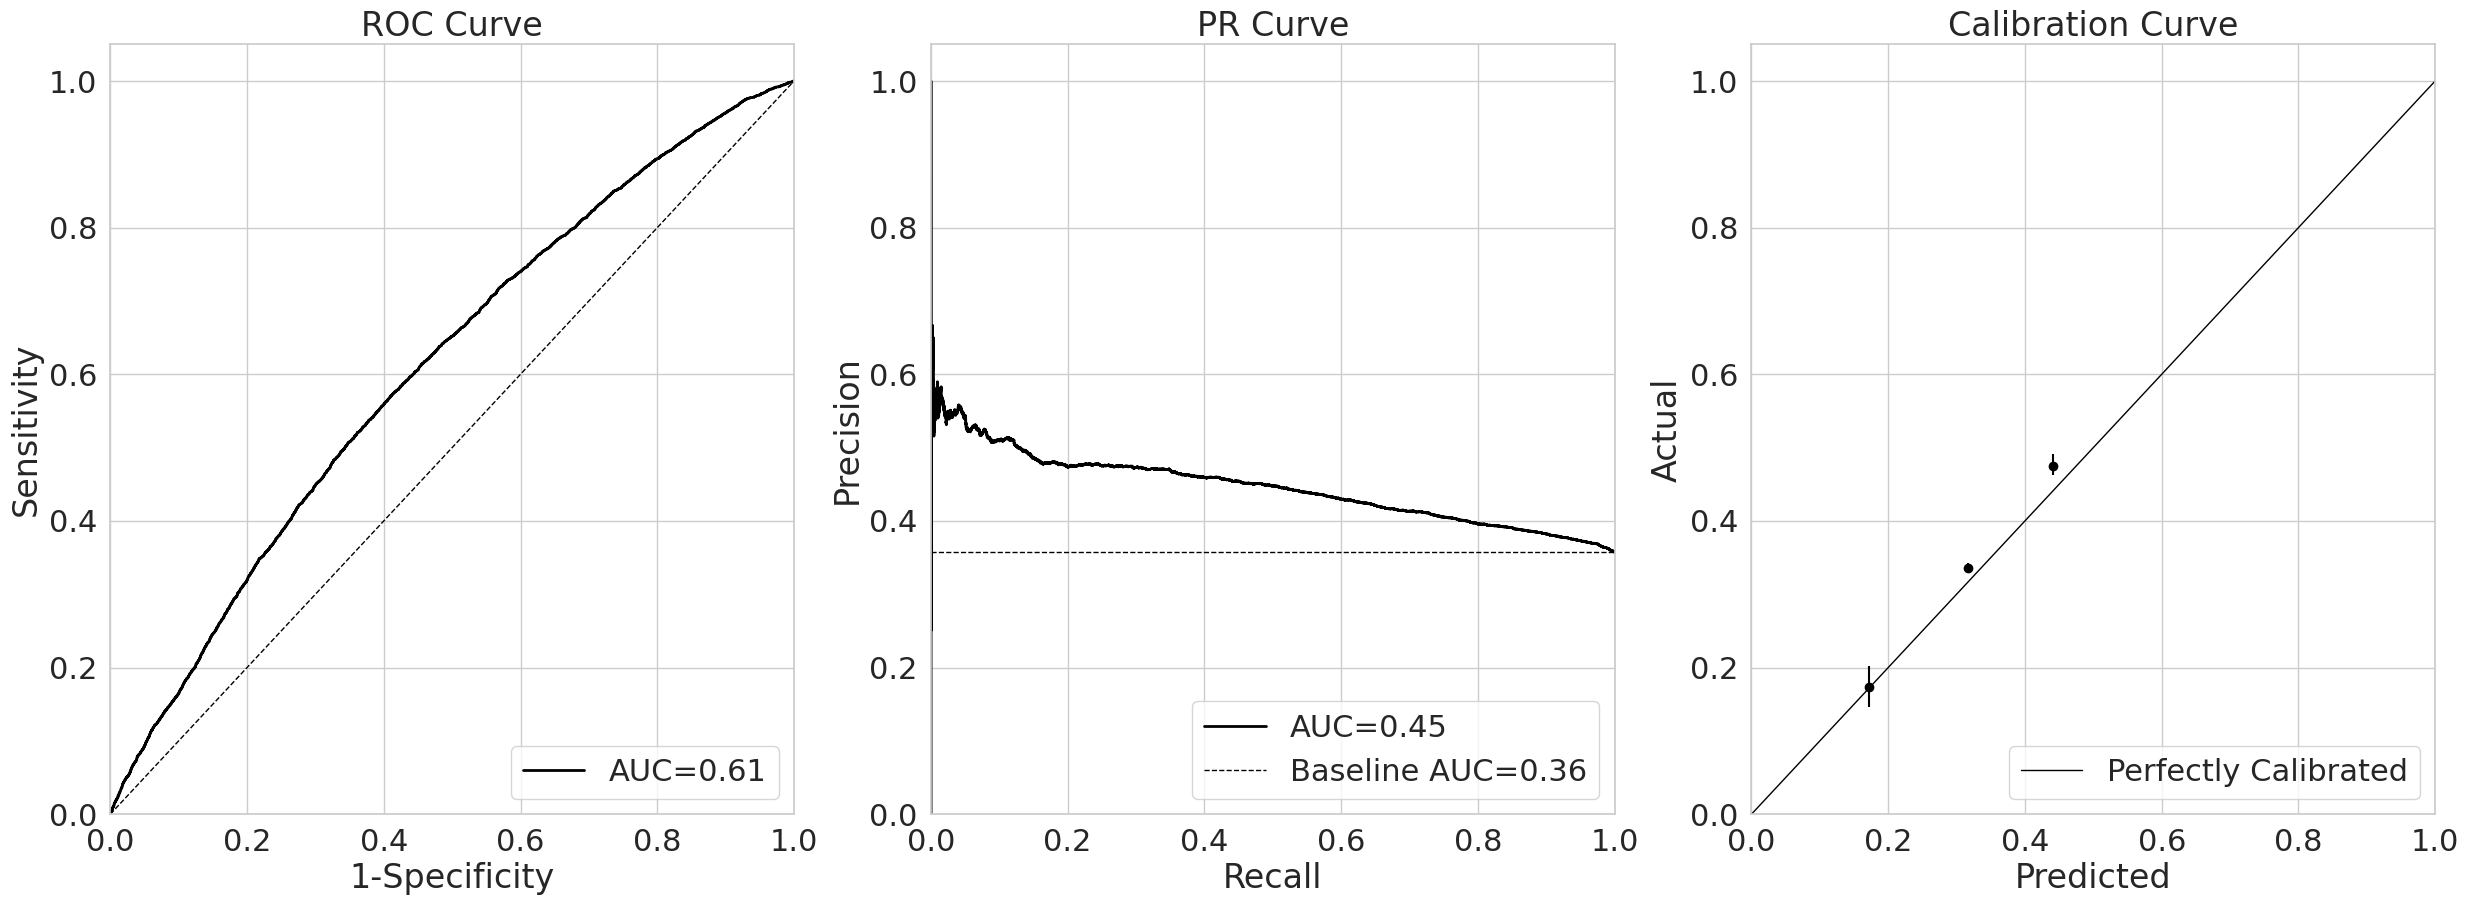

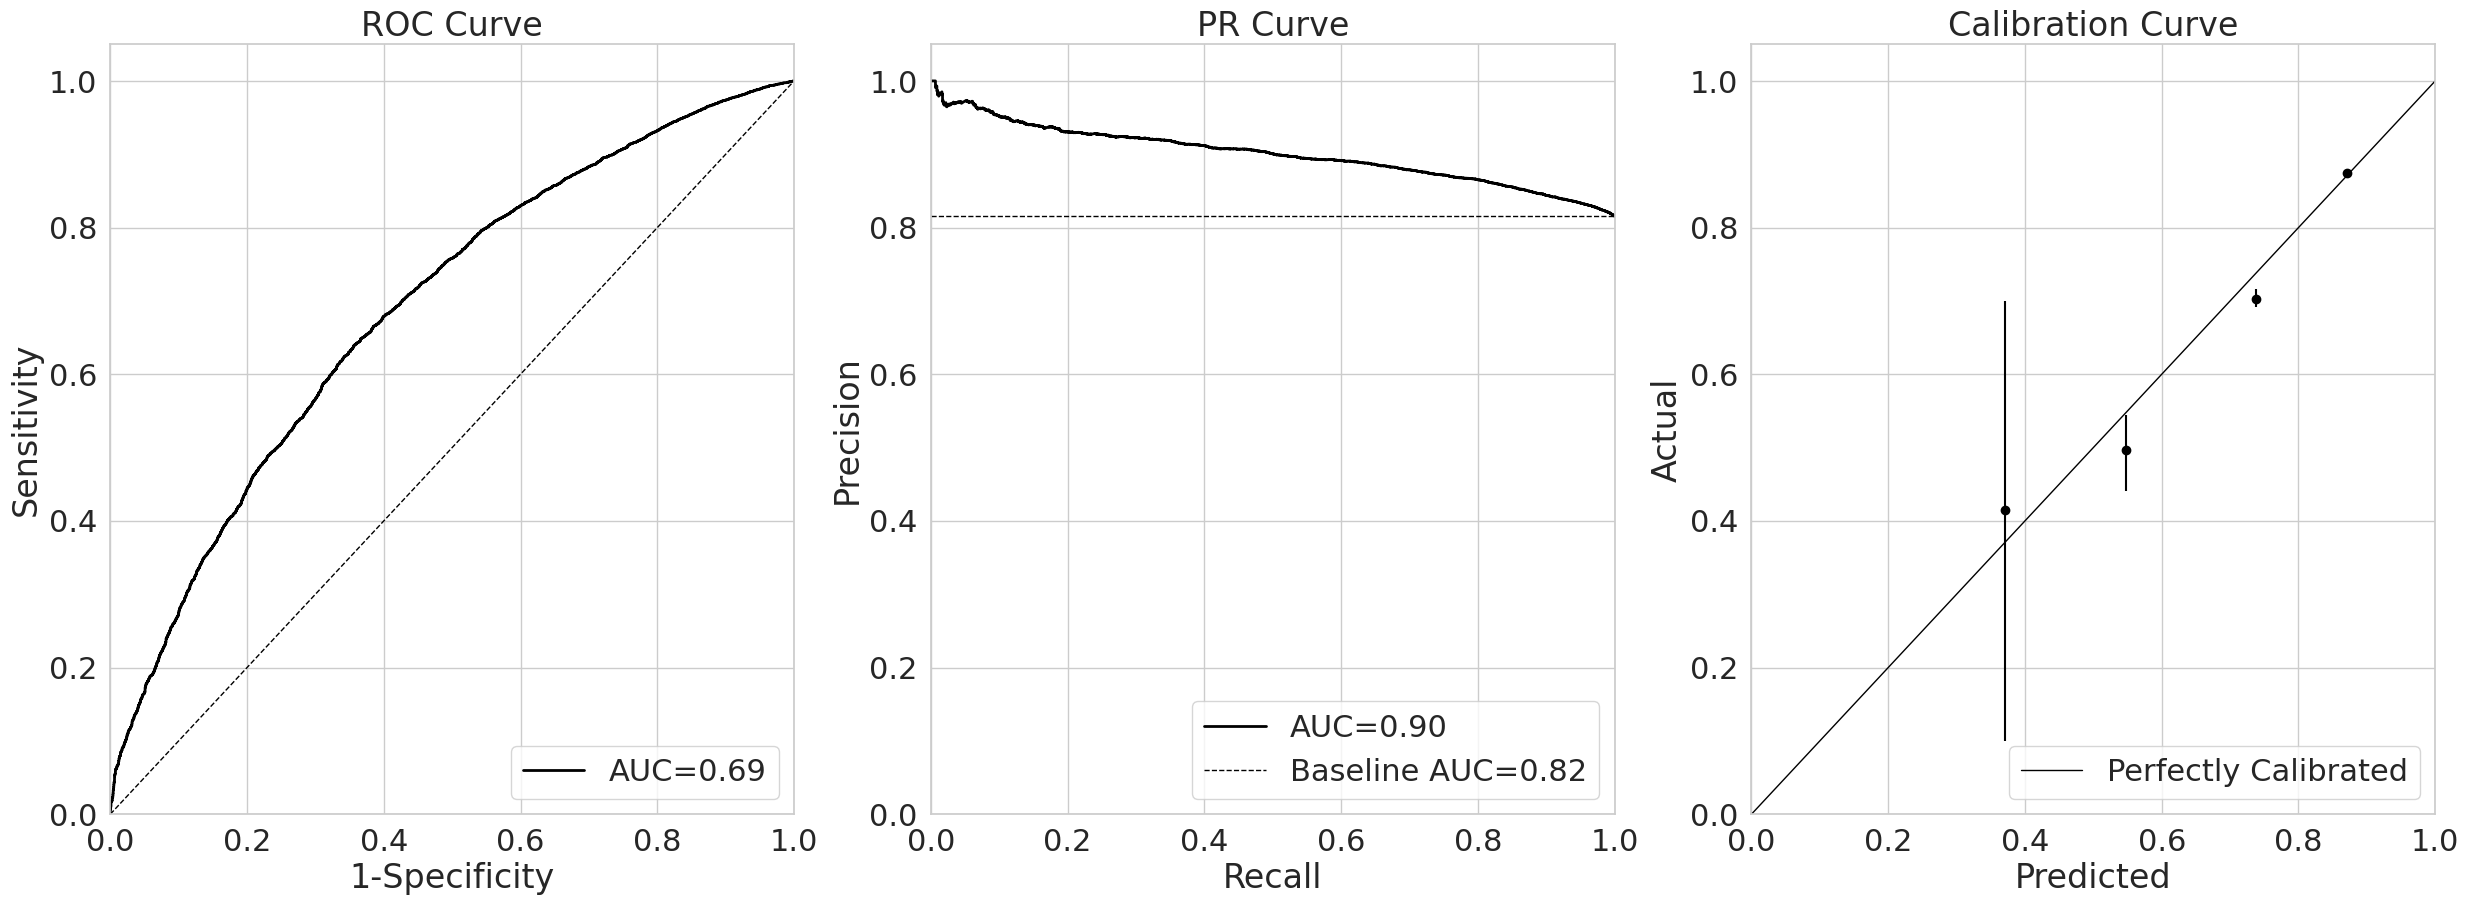

In [4]:
from healthrex_ml.evaluators import BinaryEvaluator
from tqdm import tqdm
import pandas as pd
import os
tasks = ['label_PLT', 'label_HCT', 'label_WBC', 'label_HGB']
for task in tqdm(tasks):
    evalr = BinaryEvaluator(
        outdir=f"./{RUN_NAME}_artifacts/{task}_performance_artificats/",
        task_name=task
    )
    df_yhats = pd.read_csv(os.path.join(trainer.working_dir, f"{task}_classification_yhats.csv"))
    evalr(df_yhats.labels, df_yhats.predictions)